# WS 1.8: The Thingamajig!

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.8. For: 23 October, 2024.*

## Objective

This workshop focuses fundamental skills for building, using and understanding multivariate distributions: in particular when our variables are no longer statistically independent.

For our case study we will use a Thingamajig: an imaginary object for which we have limited information. One thing we _do_ know, however, is that it is very much influenced by two random variables, $X_1$ and $X_2$: high values for these variables can cause the Thingamajig to fail. We will use a multivariate probability distribution to compute the probability of interest under various _cases_ (we aren't sure which one is relevant, so we consider them all!). We will also use a comparison of distributions drawn from our multivariate probability model with the empirical distributions to validate the model.

### Multivariate Distribution (Task 1)

In Task 1 we will build a multivariate distribution, which is defined by a probability density function. From now on, we will call it _bivariate_, since there are only two random variables:

$$
f_{X_1,X_2}(x_1,x_2)
$$

This distribution is implemented in `scipy.stats.multivariate_normal`. The bivariate normal distribution is defined by 5 parameters: the parameters of the Gaussian distribution for $X_1$ and $X_2$, as well as the correlation coefficient between them, $\rho_{X_1,X_2}$. In this case we often refer to $X_1$ and $X_2$ as the marginal variables (univariate) and the bivariate distribution as the joint distribution. We will use the bivariate PDF to create contour plots of probability density, as well as the CDF to evaluate probabilities of different cases:

$$
F_{X_1,X_2}(x_1,x_2)
$$


### Cases (Task 2)

We will consider three different cases and see how the probability of interest is different for each, as well as how they are influenced by the dependence structure of the data. The cases are described here; although they vary slightly, they have something in common: _they are all integrals of the bivariate PDF over some domain of interest $\Omega$._


#### Case 1: Union (OR)

The union case is relevant if the Thingamajig fails when either or both random variable exceeds a specified value:

$$
P[X_1>x_1]\cup P[X_2>x_2]
$$

This is also called the "OR" probability because it considers either one variable _or_ the other _or_ both exceeding a specified value.

#### Case 2: Intersection (AND)

The intersection case is relevant if the Thingamajig fails when the specified interval for each random variable are exceeded together:

$$
P[X_1>20]\cap P[X_2>20]
$$

This is also called the "AND" probability because it considers _both_ variables exceeding a specified value.

#### Case 3: Function of Random Variables 

Often it is not possible to describe a region of interest $\Omega$ as a simple union or intersection probability. Instead, there are many combinations of $X_1$ and $X_2$ that define $\Omega$. If we can integrate the probability density function over this region we can evaluate the probability.

Luckily, it turns out there is some extra information about the Thingamajig: a function that describes some aspect of its behavior that we are very very interested in:

$$
Z(X_{1},X_{2}) = 800 - X_{1}^2 - 20X_{2}
$$

where the condition in which we are interested occurs when $Z(X_{1},X_{2})<0$. Thus, the probability of interest is:

$$
P[X_1,X_2:\; Z<0]
$$

#### Evaluating Probabilities in Task 2

Cases 1 and 2 can be evaluated with the bivariate cdf directly because the integral bounds are relatively simple (be aware that some arithmetic and thinking is required, it's not so simple as `multivariate.cdf()`).

Case 3 is not easy to evaluate because it must be integrated over a complicated region. Instead, we will approximate the integral numerically using _Monte Carlo simulation_ (MCS). This is also how we will evaluate the distribution of the function of random variables in Task 3. Remember, there are four essential steps to MCS:

1. Define distributions for random variables (probability density over a domain)  
2. Generate random samples  
3. Do something with the samples (deterministic calculation)  
4. Evaluate the results: e.g., “empirical” PDF, CDF of samples, etc.

_Note that as we now have a multivariate distribution we can no longer sample from the univariate distributions independently!_

### Task 3: Validating the Bivariate Distribution

This task uses the distribution of the function of random variables (univariate) to validate the bivariate distribution, by comparing the empirical distribution to our model. Once the sample is generated, it involves the same goodness of fit tools that we used last week.


<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
The cell below allows you to edit the contents of helper and incorporate the changes in the notebook without restarting the kernel.
</p>
</div>

In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from helper import plot_contour

## Part 1: Creating a Bivariate Distribution

We need to represent our two dependent random variables with a bivariate distribution; a simple model is the bivariate Gaussian distribution, which is readily available via `scipy.stats.multivariate_normal`. To use it in this case study, we first need to check that the marginal distributions are each Gaussian, as well as compute the covariance and correlation coefficient.

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
Import the data in <code>data.csv</code>, then find the parameters of a normal distribution to fit to the data for each marginal. <em>Quickly</em> check the goodness of fit and state whether you think it is an appropriate distribution (we will keep using it anyway, regardless of the answer).
<p>
<em>Don't spend more than a few minutes on this, you should be able to quickly use some of your code from last week.</em>
</p>
</p>
</div>

In [90]:
data = np.genfromtxt('data.csv', delimiter=";")
data.shape

(1000, 2)

In [91]:
# YOUR_CODE_HERE # probably many lines

# SOLUTION
data_x1 = np.array(data[:,0])
data_x2 = np.array(data[:,1])

X1 = st.norm(data_x1.mean(), data_x1.std())
X2 = st.norm(data_x2.mean(), data_x2.std())
print(data_x1.mean(), data_x1.std())
print(data_x2.mean(), data_x2.std())

10.124711 3.1256827640499605
15.042626 5.0734512576868225


<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution:</b>   
In addition to the code above, you should use some of the techniques from WS 1.7 and GA 1.7 to confirm that the marginal distributions are well-approximated by a normal distribution.
</p>
</div>

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   
Write two functions to compute the covariance and correlation coefficient between the two random variables. Print the results.

<b>The input arguments should be Numpy arrays and you should calculate each value without using a pre-existing Python package or method.</b>
</p>
</div>

In [92]:
# def calculate_covariance(X1, X2):
#     '''
#     Covariance of two random variables X1 and X2 (numpy arrays).
#     '''
#     YOUR_CODE_HERE # may be more than one line
#     return covariance

# def pearson_correlation(X1, X2):
#     YOUR_CODE_HERE # may be more than one line
#     return correl_coeff

# SOLUTION
def calculate_covariance(X1, X2):
    '''
    Covariance of two random variables X1 and X2 (numpy arrays).
    '''
    mean_x1 = X1.mean()
    mean_x2 = X2.mean()
    diff_x1 = X1 - mean_x1
    diff_x2 = X2 - mean_x2
    product = diff_x1 * diff_x2
    covariance = product.mean()
    return covariance

def pearson_correlation(X1, X2):
    covariance = calculate_covariance(X1, X2)
    correl_coeff = covariance/(X1.std()*X2.std())
    return correl_coeff

In [93]:
covariance = calculate_covariance(data_x1, data_x2)
print(f'The covariance of X1 and X2 is {covariance:.5f}')
correl_coeff = pearson_correlation(data_x1, data_x2)
print(f'The correlation coefficient of X1 and X2 is {correl_coeff:.5f}')

The covariance of X1 and X2 is 9.47317
The correlation coefficient of X1 and X2 is 0.59737


<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b>   
Build the bivariate distribution using <code>scipy.stats.multivariate_normal</code> (as well as the mean vector and covariance matrix). To validate the result, create a plot that shows contours of the joint PDF, compared with the data (see note below). Comment on the quality of the fit in 2-3 sentences or bullet points.
</p>
</div>

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Use the helper function <code>plot_contour</code> in <code>helper.py</code>; it was already imported above. Either look in the file to read it, or view the documentation in the notebook with <code>plot_contour?</code></p>

<p><em>Hint: for this Task use the optional </em><code>data</code><em> argument!.</em></p></div>

In [94]:
# plot_contour? # uncomment and run to read docstring

In [95]:
# mean_vector = YOUR_CODE_HERE
# cov_matrix = YOUR_CODE_HERE
# bivar_dist = YOUR_CODE_HERE

# SOLUTION
mean_vector = [data_x1.mean(), data_x2.mean()]
cov_matrix = [[data_x1.std()**2, covariance],
              [covariance, data_x2.std()**2]]
bivar_dist = st.multivariate_normal(mean_vector, cov_matrix)

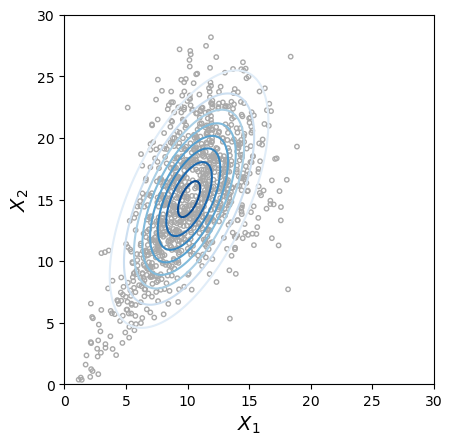

In [96]:
# plot_contour(YOUR_CODE_HERE, [0, 30, 0, 30], data=YOUR_CODE_HERE);

# SOLUTION
plot_contour(bivar_dist, [0, 30, 0, 30], data=data);

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution:</b>   
Overall the fit looks good:
<ol>
    <li>Most points are captured within the contours</li>
    <li>Highest density of points is near the center of the contours (mode)</li>
    <li>Diagonal trend (positive correlation!) is captured well</li>
    <li>There are a few clusters of points that "stick out" from the contours, especially in the upper right</li>
</ol>

</p>
</div>

## Part 2: Using the Bivariate Distribution

Now that we have the distribution, we will use it compute probabilities related to the three cases, presented above, as follows:

1. $P[X_1>20]\cup P[X_2>20]$
2. $P[X_1>20]\cap P[X_2>20]$
3. $P[X_1,X_2:\; Z<0]$

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>
    
For each of the three cases, do the following:

<ol>
    <li>Compute the requested probability using the empirical distribution.</li>
    <li>Compute the requested probability using the bivariate distribution.</li>
    <li>Create a bivariate plot that includes PDF contours <em>and</em> the region of interest.</li>
    <li>Repeat the calculations for additional cases of correlation coefficient (+0.9, 0.0, -0.9) to see how the answer changes (you can simply regenerate the plot, you don't need to make multiple versions). <em>You can save this sub-task for later if you are running out of time. It is more important to get through Task 3 during the in-class session.</em></li>
    <li>Write two or three sentences that summarize the results and explains the quantitative impact of correlation coefficient. Make a particular note about whether or not one case may or be affected more or less than the others.</li>
</ol>
    

</p>
</div>

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Note that the optional arguments in the helper function <code>plot_contour</code> will be useful here--<b>also for the Project on Friday!</b>

Here is an example code that shows you what it can do (the values are meaningless)
</p></div>

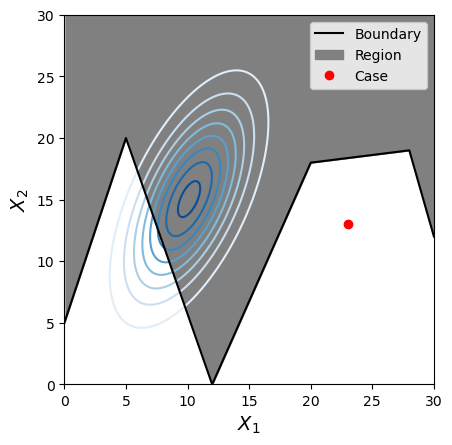

In [97]:
region_example = np.array([[0, 5, 12, 20, 28, 30],
                           [5, 20, 0, 18, 19, 12]])

plot_contour(bivar_dist, [0, 30, 0, 30],
             case=[23, 13],
             region=region_example);


<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 2.1 and 2.2:</b> create cells below to carry out the OR and AND calculations.
</p>
</div>

In [98]:
# YOUR_CODE_HERE
# DEFINITELY more than one line.
# probably several cells too ;)

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 2.3:</b> create cells below to carry out the Case 3 calculations.

Note that in this case you need to make the plot to visualize the region over which we want to integrate. We need to define the boundary of the region of interest by solving the equation $Z(X_1,X_2)$ for $X_2$ when $Z=0$.
</p>
</div>

The equation can be defined as follows:

$$
\textrm{WRITE THE EQUATION HERE}
$$

which is then defined in Python and included in the `plot_contours` function as an array for the keyword argument `region`.

In [99]:
# YOUR_CODE_HERE
# DEFINITELY more than one line.
# probably several cells too ;)

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Start of solution for Task 2.</b>
</p>
</div>

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Note: order of the tasks in this solution is not important.</p></div>

### Case 1 and 2

First we will compute the probabilities from the distribution.

In [100]:
lower_left = bivar_dist.cdf([20, 20])
union = 1 - lower_left

left = X1.cdf(20)
bottom = X2.cdf(20)
intersection = 1 - (left + bottom - lower_left)

print(f'     lower left:      {lower_left:.5f}')
print(f'     left side:       {left:.5f}')
print(f'     bottom side:     {bottom:.5f}')
print('=============================')
print(f'Case 1, Union:        {union:.5f}')
print(f'Case 2, Intersection: {intersection:.5f}')

     lower left:      0.83567
     left side:       0.99921
     bottom side:     0.83575
Case 1, Union:        0.16433
Case 2, Intersection: 0.00072


And now the **empirical** probabilities:

_Note: we redefine variables from above!_

In [101]:
N = data_x1.size

number_of_points_lower_left = sum((data_x1 < 20)&(data_x2 < 20))
lower_left = number_of_points_lower_left/(N + 1)
union = 1 - lower_left

left = sum(data_x2 < 20)/(N + 1)
bottom = sum(data_x1 < 20)/(N + 1)
intersection = 1 - (left + bottom - lower_left)

print(f'     lower left:      {lower_left:.5f}')
print(f'     left side:       {left:.5f}')
print(f'     bottom side:     {bottom:.5f}')
print('=============================')
print(f'Case 1, Union:        {union:.5f}')
print(f'Case 2, Intersection: {intersection:.5f}')

     lower left:      0.83816
     left side:       0.83816
     bottom side:     0.99900
Case 1, Union:        0.16184
Case 2, Intersection: 0.00100


It looks like the union probabilities are pretty close, whereas the intersection probabilities differ by nearly an order of magnitude! The reason why can be seen by using the plots.

Make the plots:

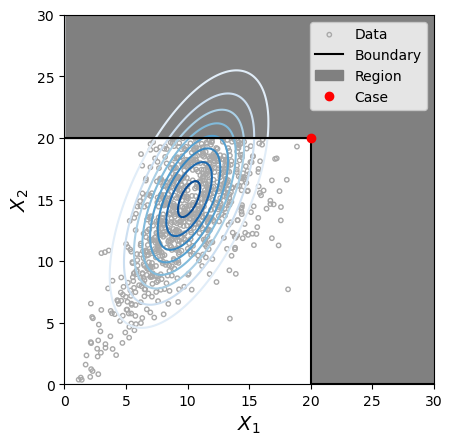

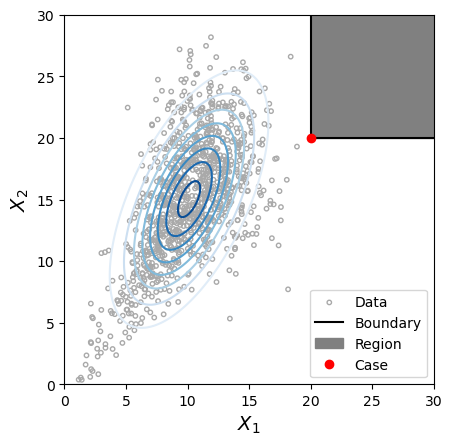

In [102]:
region_or = np.array([[0, 20, 20, 30],
                      [20, 20, 0, 0]])

plot_contour(bivar_dist, [0, 30, 0, 30],
             case=[20, 20],
             region=region_or,
             data=data);

region_and = np.array([[20, 20, 30],
                      [30, 20, 20]])

plot_contour(bivar_dist, [0, 30, 0, 30],
             case=[20, 20],
             region=region_and,
             data=data);

### Case 3

Now for the function of random variables. First we will make the plot to visualize the region over which we want to integrate. We need to define the boundary of the region of interest by solving the equation $Z(X_1,X_2)$ for $X_2$ when $Z=0$:

$$
X_2 = 40 - \frac{X_1^2}{20}
$$

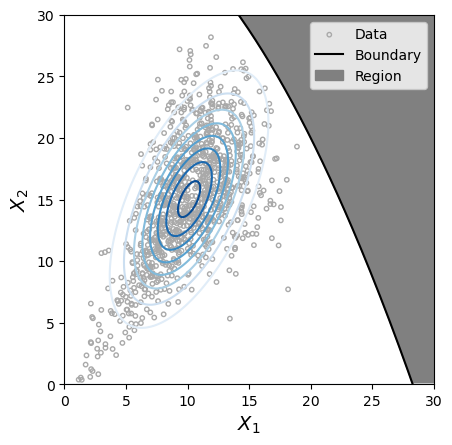

In [103]:
plot_x = np.linspace(0, 30, 200)
plot_y = 40 - plot_x**2/20
plot_xy = np.vstack((plot_x, plot_y))

plot_contour(bivar_dist, [0, 30, 0, 30],
             region=plot_xy,
             data=data);


And now let's calculate the probabilities. First using the bivariate distribution:

In [104]:
sample_N = 100*N
sample = bivar_dist.rvs(size=sample_N)
sample_X1 = sample[:,0]
sample_X2 = sample[:,1]

Z = lambda X1, X2: 800 - X1**2 - 20*X2
sample_Z = Z(sample_X1, sample_X2)
Z_less_than_0 = sum(sample_Z<0)

print(f'The number of samples of Z < 0 is: {Z_less_than_0}')
print(f'This is {Z_less_than_0/sample_N*100:.3f}% of all samples.')
print(f'The MCS probability is {Z_less_than_0/sample_N:.3f}.')

The number of samples of Z < 0 is: 873
This is 0.873% of all samples.
The MCS probability is 0.009.


And now the empirical probabilities:

In [105]:
empirical_Z = Z(data_x1, data_x2)
Z_data_less_than_0 = sum(empirical_Z<0)

print(f'The number of data where Z < 0 is: {Z_data_less_than_0}')
print(f'This is {Z_data_less_than_0/(N + 1)*100:.3f}% of all samples.')
print(f'The empirical probability is {Z_data_less_than_0/(N + 1):.3f}.')

The number of data where Z < 0 is: 2
This is 0.200% of all samples.
The empirical probability is 0.002.


It turns out that the estimated probability is about four times the value of the empirical probability. This doesn't seem too bad for this case.

_Note that if your sample size is small (e.g., order 10^3 or 10^4), the values of your probability may change by +/-10^-2 on each iteration; increase the sample size until the calculation for Case 3 is stable. This is illustrated in the following plot, which shows how the probability changes as the sample size increases. Coefficient of variation of the estimated $p$ is also shown (a c.o.v. of 0.1 is a typical target for an acceptable MCS.)_

In [106]:
def get_p_and_c_o_v(sample):
    """For sample N return p and c.o.v. for each N_i in N.
    
    Allows one to see how values change as the sample size increases.
    """
    N = len(sample)
    sample_X1 = sample[:,0]
    sample_X2 = sample[:,1]
    Z = lambda X1, X2: 800 - X1**2 - 20*X2
    sample_Z = Z(sample_X1, sample_X2)

    p = np.zeros(N)
    c_o_v = np.zeros(N)
    for i in range(N):
        p[i] = sum(sample_Z[0:i]<0)/(i+1)
        if p[i] == 0:
            c_o_v[i] = 0
        else:
            c_o_v[i] = 1/np.sqrt((i+1)*p[i])

    return p, c_o_v

try_N = 10000
p, c_o_v = get_p_and_c_o_v(bivar_dist.rvs(size=try_N))



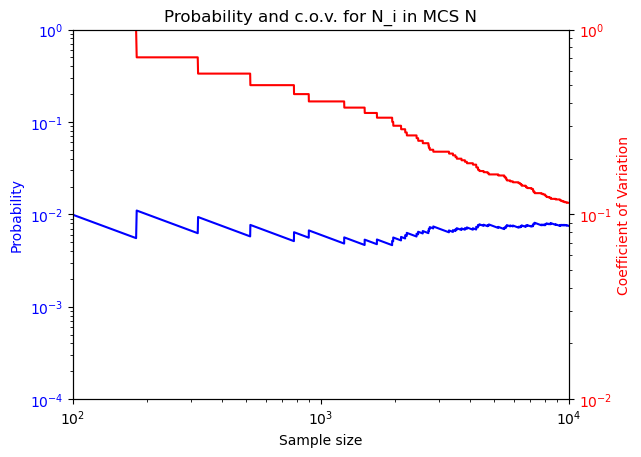

In [107]:
fig, ax1 = plt.subplots()

ax1.plot(range(try_N), p, 'b-')
ax1.set_xlabel('Sample size')
ax1.set_ylabel('Probability', color='b')
ax1.set_title('Probability and c.o.v. for N_i in MCS N')
ax1.set_xlim(100, try_N)
ax1.set_xscale('log')
ax1.set_ylim(1/try_N, 1)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(range(try_N), c_o_v, 'r-')
ax2.set_ylabel('Coefficient of Variation', color='r')
ax2.set_ylim(1e-2, 1)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
We do not include the calculations for the different correlation coefficients here for compactness. All you need to do is define a new mulitivariate normal object and redefine the covariance matrix, then re-run the analyses (actually, it's best to do it in a function, which returns the probabilities of interest).
    
Some key observations about the calculated probabilities (not exhaustive):
<ol>
    <li>Higher positive dependence increases probability for all cases.</li>
    <li>Independence decreases probability compared to original correlation coefficient (all cases).</li>
    <li>Negative correlation decreases probability for cases 2 and 3, but increases probability for case 1.</li>
</ol>
You should be able to confirm these observations by considering how the contours of probability density change relative to the region of interest, as well as by computing them numerically.
</p>
</div>

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Note: the bivariate figures are an important concept for the exam, so if using the code is too difficult for you to use when studying on your own, try sketching it on paper.</p></div>

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>End of solution for Task 2.</b>
</p>
</div>

## Part 3: Validate Bivariate with Monte Carlo Simulation

Now that we have seen how the different cases give different values of probability, let's focus on the function of random variables. This is a more interesting case because we can use the samples of $Z$ to approximate the distribution $f_Z(z)$ and use the empirical distribution of $Z$ to help validate the bivariate model.

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\textbf{Task 3:}$
    
Do the following:

- Use Monte Carlo Simulation to create a sample of $Z(X_1,X_2)$ and compare this distribution to the empirical distribution.</li>
- Write 2-3 sentences assessing the quality of the distribution from MCS, and whether the bivariate distribution is acceptable for this problem. Use qualitative and quantitative measures from last week to support your arguments.
    
</p>
<p>
    <em>Note: it would be interesting to fit a parametric distribution to the MCS sample, but it is not required for this assignment.</em>
</p>
</div>

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\textbf{Solution}$

Two plots were created below to compare the distributions from the data (empirical) and MCS sample, which is based on the probability "model"---our bivariate distribution. It is clear that the fit is not great: although the upper tail looks like a good fit (third figure), the first and second figures clearly show that the lower tail (see, e.g., value of $Z=0$) and center of the distribution (see, e.g., the mode) differ by around 100 units.

The reason why is best explained by looking at the bivariate plot above from Task 1: we can see that the data is not well matched by the probability density contours in the upper right corner of the figure, which is precisely where our region of interest is (when $Z<0$). Whether or not the model is "good enough" depends on what values of $Z$ we are interested (we might need more information about the Thingamajig). Since we have focused on the condition where $Z<0$, which does not have a good fit, we should not accept this model and consider a different multivariate model for $f_{X_1,X_2}(x_1,x_2)$.

Note that the probability $P[Z<0]$ calculated for Case 3 in Part 2 indicates the model is not bad (0.002 and 0.007); however, the univariate distribution tells a different story!
    
This is actually a case where the dependence between $X_1$ and $X_2$ is not possible to describe as a simple linear relationship (which is what the Pearson correlation coefficient $\rho$ tells us). This is easy to identify visually by observing how scattered the data is around an imaginary line that follows the main axis of the data. As values of $X_1$ and $X_2$ increase, the variance about this imaginary line increases. An extra plot below is added to compare the two distributions: the empirical one on the left (with non-linear dependence) and the theoretical distribution on the right (multivariate Gaussian, with linear dependence). This concept is illustrated quantitatively by comparing the correlation coefficients calculated using only the data from each "quadrant" of the random variable space (separated by the means $\mu_{X_1}$ and $\mu_{X_2}$). In addition, the colors of the dots are determined by the value of the covariance term (scaled by the product of the standard deviations); this illustrates the effect of the high and low values in the lower-left and upper-right quadrants, respectively, and the reason that the relationship between $X_1$ and $X_2$ cannot be captured by a single value of the correlation coefficient $\rho$.  To capture the non-linearity we need a non-Gaussian multivariate distribution; unfortunately these are outside the scope of MUDE.

The Pearson correlation coefficient measures the linear relationship between variables. However, in the case of this data set specifically, it may be more appropriate to call the relationship in the upper-right quadrant "less" linear rather than non-linear, as it is clear the overall relationship between $X_1$ and $X_2$ is increasing, a fact that is captured by $\rho=0.597$ for all data.

</p>
</div>

![dependence comparison](./dependence_illustrated.svg)

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 3.1:</b> Plot histograms of $Z$ based on the Monte Carlo samples, and based on the data. Note that you probably already computed the samples in Part 2.
</p>
</div>

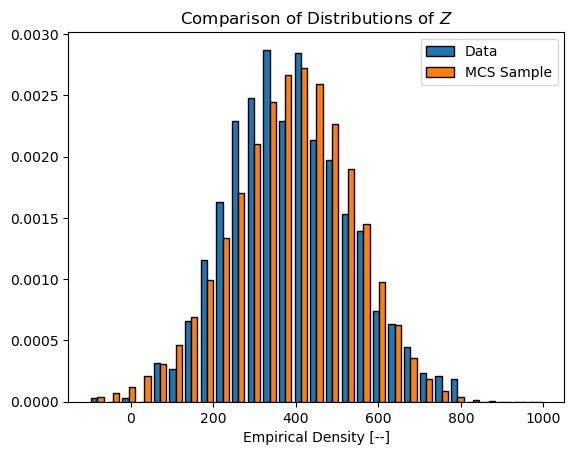

In [108]:
# plot_values = np.linspace(-100, 1000, 30)
# fig, ax = plt.subplots(1)
# ax.hist([YOUR_CODE_HERE, YOUR_CODE_HERE],
#          bins=plot_values,
#          density=True,
#          edgecolor='black');
# ax.legend(['Data', 'MCS Sample'])
# ax.set_xlabel('$Z(X_1,X_2)$')
# ax.set_xlabel('Empirical Density [--]')
# ax.set_title('Comparison of Distributions of $Z$');

# SOLUTION
plot_values = np.linspace(-100, 1000, 30)
fig, ax = plt.subplots(1)
ax.hist([empirical_Z, sample_Z],
         bins=plot_values,
         density=True,
         edgecolor='black');
ax.legend(['Data', 'MCS Sample'])
ax.set_xlabel('$Z(X_1,X_2)$')
ax.set_xlabel('Empirical Density [--]')
ax.set_title('Comparison of Distributions of $Z$');

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 3.2:</b> Define a function to compute the ecdf.
</p>
</div>

In [109]:
# def ecdf(var):
#     x = YOUR_CODE_HERE # sort the values from small to large
#     n = YOUR_CODE_HERE # determine the number of datapoints
#     y = YOUR_CODE_HERE
#     return [y, x]

# SOLUTION:
def ecdf(var):
    x = np.sort(var) # sort the values from small to large
    n = x.size # determine the number of datapoints
    y = np.arange(1, n+1) / (n + 1)
    return [y, x]


<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 3.3:</b> Create a semi-log plot of the non-exceedance probability.
</p>
</div>

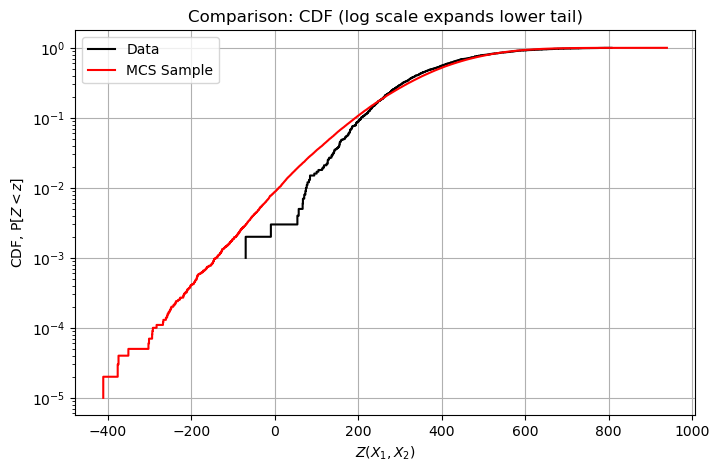

In [110]:
# fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#           color='k', label='Data')
# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           color='r', label='MCS Sample')
# axes.set_xlabel('$Z(X_1,X_2)$')
# axes.set_ylabel('CDF, $\mathrm{P}[Z < z]$')
# axes.set_title('Comparison: CDF (log scale expands lower tail)')
# axes.set_yscale('log')
# axes.legend()
# axes.grid()

# SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

axes.step(ecdf(empirical_Z)[1], ecdf(empirical_Z)[0], 
          color='k', label='Data')
axes.step(ecdf(sample_Z)[1], ecdf(sample_Z)[0],
          color='r', label='MCS Sample')
axes.set_xlabel('$Z(X_1,X_2)$')
axes.set_ylabel(r'CDF, $\mathrm{P}[Z < z]$')
axes.set_title('Comparison: CDF (log scale expands lower tail)')
axes.set_yscale('log')
axes.legend()
axes.grid()

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 3.4:</b> Create a semi-log plot of the exceedance probability.
</p>
</div>

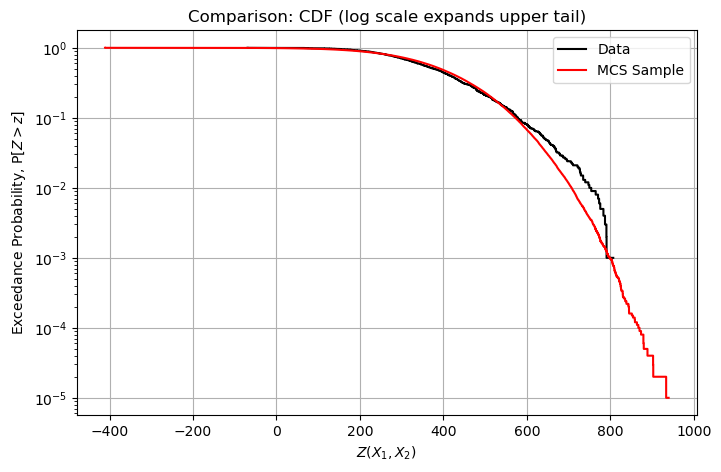

In [111]:
# fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#           color='k', label='Data')
# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           color='r', label='MCS Sample')
# axes.set_xlabel('$Z(X_1,X_2)$')
# axes.set_ylabel('Exceedance Probability, $\mathrm{P}[Z > z]$')
# axes.set_title('Comparison: CDF (log scale expands upper tail)')
# axes.set_yscale('log')
# axes.legend()
# axes.grid()

# SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

axes.step(ecdf(empirical_Z)[1], 1-ecdf(empirical_Z)[0], 
          color='k', label='Data')
axes.step(ecdf(sample_Z)[1], 1-ecdf(sample_Z)[0],
          color='r', label='MCS Sample')
axes.set_xlabel('$Z(X_1,X_2)$')
axes.set_ylabel(r'Exceedance Probability, $\mathrm{P}[Z > z]$')
axes.set_title('Comparison: CDF (log scale expands upper tail)')
axes.set_yscale('log')
axes.legend()
axes.grid()

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"><p>In case you are wondering, the data for this exercise was computed with a Clayton Copula. A Copula is a useful way of modelling non-linear dependence. If you would like to learn more about this, you should consider the 2nd year cross-over module CEGM2005 Probabilistic Modelling of real-world phenomena through ObseRvations and Elicitation (MORE).</p></div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.